In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 1. Load the processed data from Notebook 1
df = pd.read_parquet('processed_customer_support_data.parquet')

# 2. Define our features (X) and target (y)
X = df['Cleaned_Description']
y = df['Category']

# 3. Perform the train-test split
# We'll use an 80/20 split and stratify to maintain class distribution.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [51]:
# 4. Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6775,)
Shape of X_test: (1694,)
Shape of y_train: (6775,)
Shape of y_test: (1694,)


In [52]:
# Let's also verify the distribution in the training and testing sets
print("\nDistribution in original dataset:")
print(y.value_counts(normalize=True))
print("\nDistribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution in testing set:")
print(y_test.value_counts(normalize=True))


Distribution in original dataset:
Category
Billing            0.564175
Technical Issue    0.194592
General Query      0.181131
Account Access     0.060102
Name: proportion, dtype: float64

Distribution in training set:
Category
Billing            0.564133
Technical Issue    0.194686
General Query      0.181107
Account Access     0.060074
Name: proportion, dtype: float64

Distribution in testing set:
Category
Billing            0.564345
Technical Issue    0.194215
General Query      0.181228
Account Access     0.060213
Name: proportion, dtype: float64


In [53]:
# 1. Vectorize the text data using CountVectorizer
print("Step 1: Vectorizing the text data...")
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test) # Use transform only, no fitting on test data
print("Vectorization complete.")
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Shape of X_train_vectors:", X_train_vectors.shape)

Step 1: Vectorizing the text data...
Vectorization complete.
Vocabulary size: 5312
Shape of X_train_vectors: (6775, 5312)


In [54]:
# 2. Train the Logistic Regression model
print("\nStep 2: Training the Logistic Regression model...")
log_reg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_vectors, y_train)
print("Model training complete.")


Step 2: Training the Logistic Regression model...
Model training complete.


In [55]:
# 3. Make predictions on the test data
print("\nStep 3: Making predictions on the test data...")
y_pred = log_reg.predict(X_test_vectors)
print("Prediction complete.")


Step 3: Making predictions on the test data...
Prediction complete.


In [56]:
# 4. Evaluate the model
print("\nStep 4: Evaluating the model...")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Step 4: Evaluating the model...
Accuracy: 0.5077

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.07      0.01      0.02       102
        Billing       0.57      0.83      0.68       956
  General Query       0.20      0.08      0.12       307
Technical Issue       0.24      0.11      0.15       329

       accuracy                           0.51      1694
      macro avg       0.27      0.26      0.24      1694
   weighted avg       0.41      0.51      0.43      1694




Confusion Matrix:


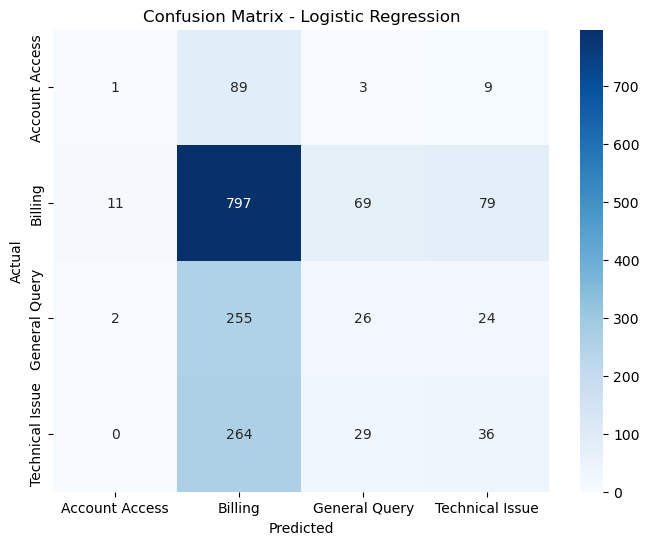

In [57]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [58]:
# 1. Vectorize the text data using TfidfVectorizer
print("Step 1: Vectorizing the text data with TF-IDF...")
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Vectorization complete.")
print("Vocabulary size:", len(tfidf_vectorizer.get_feature_names_out()))

Step 1: Vectorizing the text data with TF-IDF...
Vectorization complete.
Vocabulary size: 5312


In [59]:
# 2. Train the Multinomial Naive Bayes model
print("\nStep 2: Training the Naive Bayes model...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
print("Model training complete.")


Step 2: Training the Naive Bayes model...
Model training complete.


In [60]:
# 3. Make predictions on the test data
print("\nStep 3: Making predictions...")
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Prediction complete.")


Step 3: Making predictions...
Prediction complete.


In [61]:
# 4. Evaluate the model
print("\nStep 4: Evaluating the Naive Bayes model...")

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Step 4: Evaluating the Naive Bayes model...
Accuracy: 0.5643

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.00      0.00      0.00       102
        Billing       0.56      1.00      0.72       956
  General Query       0.00      0.00      0.00       307
Technical Issue       0.00      0.00      0.00       329

       accuracy                           0.56      1694
      macro avg       0.14      0.25      0.18      1694
   weighted avg       0.32      0.56      0.41      1694



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:


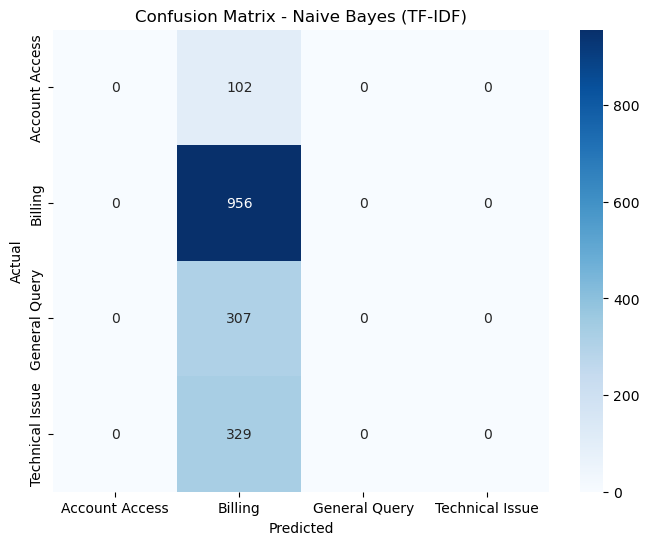

In [62]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes (TF-IDF)')
plt.show()

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [64]:
# Set parameters
VOCAB_SIZE = 10000  # Consider the top 10,000 words
MAX_LENGTH = 150    # Max length of a sequence
EMBEDDING_DIM = 100 # We will use 100-dimensional GloVe embeddings

# Create and fit the tokenizer on the training text
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>') # <OOV> for out-of-vocabulary words
tokenizer.fit_on_texts(X_train)

In [65]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure they all have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

print("Text data prepared for the neural network.")
print("Shape of padded training sequences:", X_train_pad.shape)

Text data prepared for the neural network.
Shape of padded training sequences: (6775, 150)


In [66]:
# --- 2. Prepare Labels ---

# We need to convert our text labels ('Billing', 'Technical Issue', etc.) into numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# We also need to one-hot encode them for the neural network's output layer
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded)

print("\nLabels prepared for the neural network.")
print("Shape of categorical training labels:", y_train_categorical.shape)


Labels prepared for the neural network.
Shape of categorical training labels: (6775, 4)


In [67]:
import os
from sklearn.utils import class_weight


In [68]:
# --- 3. Load GloVe Embeddings and Create Embedding Matrix ---

# Path to the GloVe file you downloaded
GLOVE_FILE = 'glove.6B/glove.6B.100d.txt' 

print("Loading GloVe embeddings... (This may take a minute)")
embeddings_index = {}
try:
    with open(GLOVE_FILE, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
except FileNotFoundError:
    print(f"Error: The GloVe file '{GLOVE_FILE}' was not found.")
    print("Please download it and place it in the same directory as the notebook.")
    # Exit or handle the error appropriately in a real script
    exit()

print(f"Found {len(embeddings_index)} word vectors.")

# Create a weight matrix for words in our training vocabulary
word_index = tokenizer.word_index
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < VOCAB_SIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print("\nEmbedding matrix created.")

Loading GloVe embeddings... (This may take a minute)
Found 400000 word vectors.

Embedding matrix created.


In [69]:
# --- 4. Build the LSTM Model ---

model = Sequential([
    # The ONLY change is here: trainable=True
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=True),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
print("\nTraining the model with fine-tuning enabled...")
history = model.fit(
    X_train_pad,
    y_train_categorical,
    epochs=20, # Increased to 20 epochs
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights_dict,
    verbose=1
)
print("Model training complete.")


Training the model with fine-tuning enabled...
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2349 - loss: 1.3927 - val_accuracy: 0.1814 - val_loss: 1.3848
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.2635 - loss: 1.3714 - val_accuracy: 0.5723 - val_loss: 1.3785
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2518 - loss: 1.3764 - val_accuracy: 0.1814 - val_loss: 1.3793
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2667 - loss: 1.3762 - val_accuracy: 0.1814 - val_loss: 1.3763
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2477 - loss: 1.3949 - val_accuracy: 0.5723 - val_loss: 1.3841
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2905 - loss: 1.3606 - val_accuracy: 0.1770 - val_loss: 1.3844
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.2961 - loss: 1.3819 - val_accuracy: 0.1770 - val_loss: 1.3901
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/s

In [71]:
print("\nEvaluating the fine-tuned model on the test set...")
y_pred_probs = model.predict(X_test_pad)
y_pred_nn = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)

accuracy_nn = accuracy_score(y_test_labels, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_nn, target_names=label_encoder.classes_))


Evaluating the fine-tuned model on the test set...
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.1812

Classification Report:
                 precision    recall  f1-score   support

 Account Access       0.00      0.00      0.00       102
        Billing       0.00      0.00      0.00       956
  General Query       0.18      1.00      0.31       307
Technical Issue       0.00      0.00      0.00       329

       accuracy                           0.18      1694
      macro avg       0.05      0.25      0.08      1694
   weighted avg       0.03      0.18      0.06      1694



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:


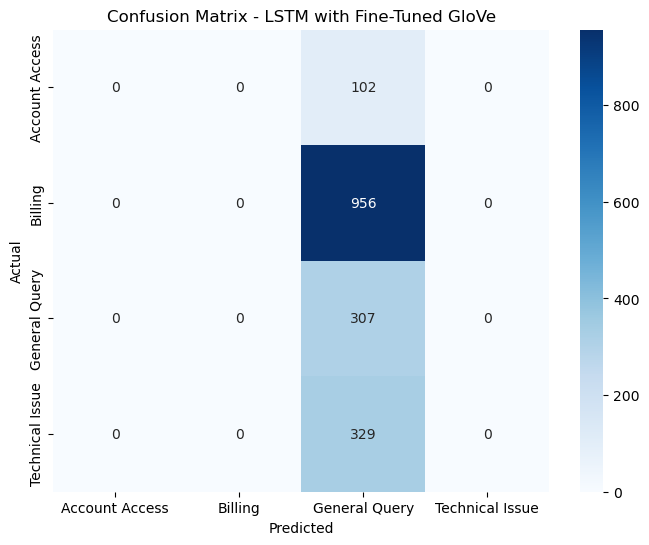

In [72]:
print("\nConfusion Matrix:")
cm_nn = confusion_matrix(y_test_labels, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM with Fine-Tuned GloVe')
plt.show()